# Install dependencies

In [1]:
import math, copy
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl, plt_house_x, plt_contour_wgrad
plt.style.use('./deeplearning.mplstyle')

# Exercise 1

## assign datapoints

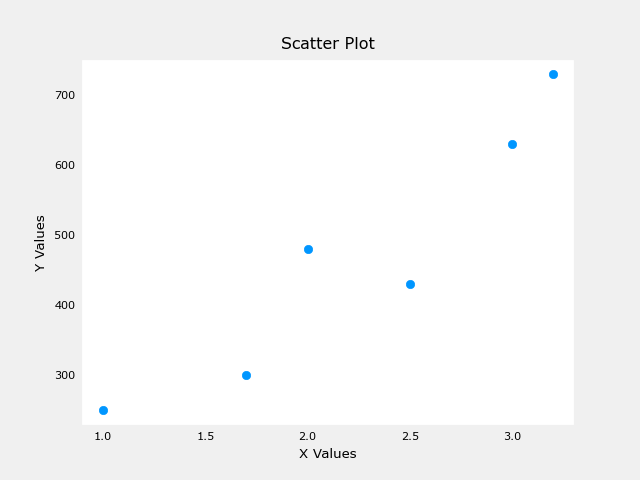

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y = np.array([250, 300, 480, 430, 630, 730])

plt.scatter(x, y)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot')
plt.show()


## Compute Cost

In [3]:
def compute_cost(x, y, w, b):
    """
    Compute the cost of a function for linear regression.
    
    Args:
        x (ndarray(m,)): Data, m examples
        y(ndarray(m)): target values
        w,b (scalar) : model parameters

    Returns:
        total_cost(float): the cost of the function
    """
    # number of examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        # Use the formula for the cost of a linear function
        f_wb = w * x[i] + b
        # Introduction of the cost function 
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1/(2 * m)) * cost_sum

    return total_cost

In [4]:
from mpl_toolkits.mplot3d import Axes3D
# Define range of w and b
w_range = np.linspace(150, 250, 300)
b_range = np.linspace(-100, 200, 400)

# Prepare the grid for storing the costs
costs = np.zeros((len(w_range), len(b_range)))
# Compute the cost for each combination
for i, w in enumerate(w_range):
    for j, b in enumerate(b_range):
        costs[i, j] = compute_cost(x, y, w, b)

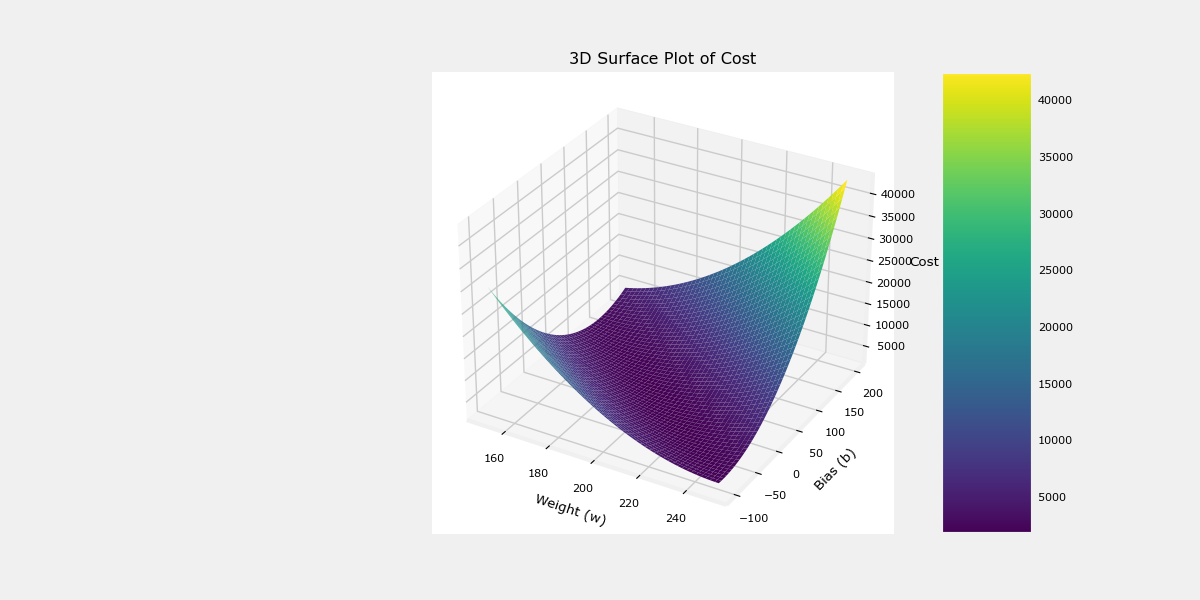

In [5]:
# Create a meshgrid for the parameters w and b
W, B = np.meshgrid(w_range, b_range)

fig = plt.figure(figsize=(12, 6))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf = ax.plot_surface(W, B, costs.T, cmap='viridis', edgecolor='none')
# Add labels and title
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost')
ax.set_title('3D Surface Plot of Cost')
fig.colorbar(surf, ax=ax, shrink=1, aspect=5)  # Add a color bar to map the cost values

# Show the plot
plt.show()


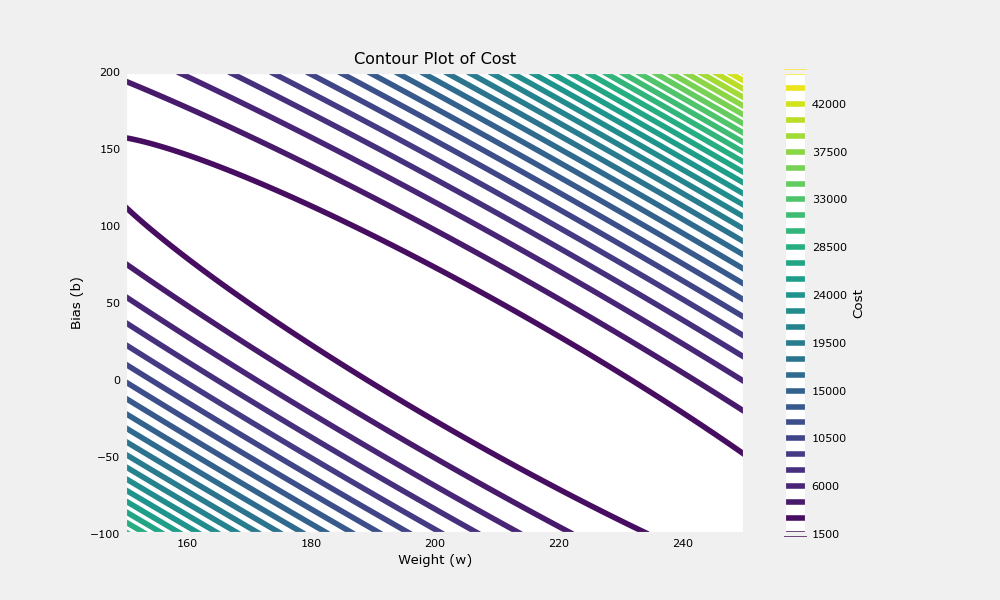

In [6]:
plt.figure(figsize=(10, 6))
plt.contour(W, B, costs.T, levels=40, cmap='viridis')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Contour Plot of Cost')
plt.colorbar(label='Cost')
plt.show()


Visual intuition indicates the minimum point is in a w of around 200, and a bias of around 25. We can compute the optimal value with the following code:

In [7]:
# Initialize parameters
w = 0.0
b = 0.0

# Learning rate
alpha = 0.01

# Number of iterations
iterations = 1000

# Number of examples
m = len(x)

# Gradient descent
for _ in range(iterations):
    # Predictions
    f_wb = w * x + b
    
    # Cost derivatives
    dw = (1/m) * np.sum((f_wb - y) * x)
    db = (1/m) * np.sum(f_wb - y)

    # Update parameters
    w -= alpha * dw
    b -= alpha * db

    #Compute the cost 
    cost = compute_cost(x, y, w, b)

    # Print the cost (comment to avoid too much output)
    print(f"Iteraction {_+1}: Cost {cost:.4f}")
#Output the final parameters
print(f"Optimal values of w and b are: w = {w:.4f}, b = {b:.4f}")
    

Iteraction 1: Cost 109412.8641
Iteraction 2: Cost 95953.6310
Iteraction 3: Cost 84180.7406
Iteraction 4: Cost 73882.8994
Iteraction 5: Cost 64875.2886
Iteraction 6: Cost 56996.2463
Iteraction 7: Cost 50104.3664
Iteraction 8: Cost 44075.9608
Iteraction 9: Cost 38802.8388
Iteraction 10: Cost 34190.3659
Iteraction 11: Cost 30155.7648
Iteraction 12: Cost 26626.6301
Iteraction 13: Cost 23539.6286
Iteraction 14: Cost 20839.3624
Iteraction 15: Cost 18477.3750
Iteraction 16: Cost 16411.2810
Iteraction 17: Cost 14604.0061
Iteraction 18: Cost 13023.1212
Iteraction 19: Cost 11640.2603
Iteraction 20: Cost 10430.6119
Iteraction 21: Cost 9372.4729
Iteraction 22: Cost 8446.8599
Iteraction 23: Cost 7637.1678
Iteraction 24: Cost 6928.8723
Iteraction 25: Cost 6309.2686
Iteraction 26: Cost 5767.2442
Iteraction 27: Cost 5293.0787
Iteraction 28: Cost 4878.2696
Iteraction 29: Cost 4515.3800
Iteraction 30: Cost 4197.9044
Iteraction 31: Cost 3920.1529
Iteraction 32: Cost 3677.1481
Iteraction 33: Cost 3464.536

Visualization of the gradient descent

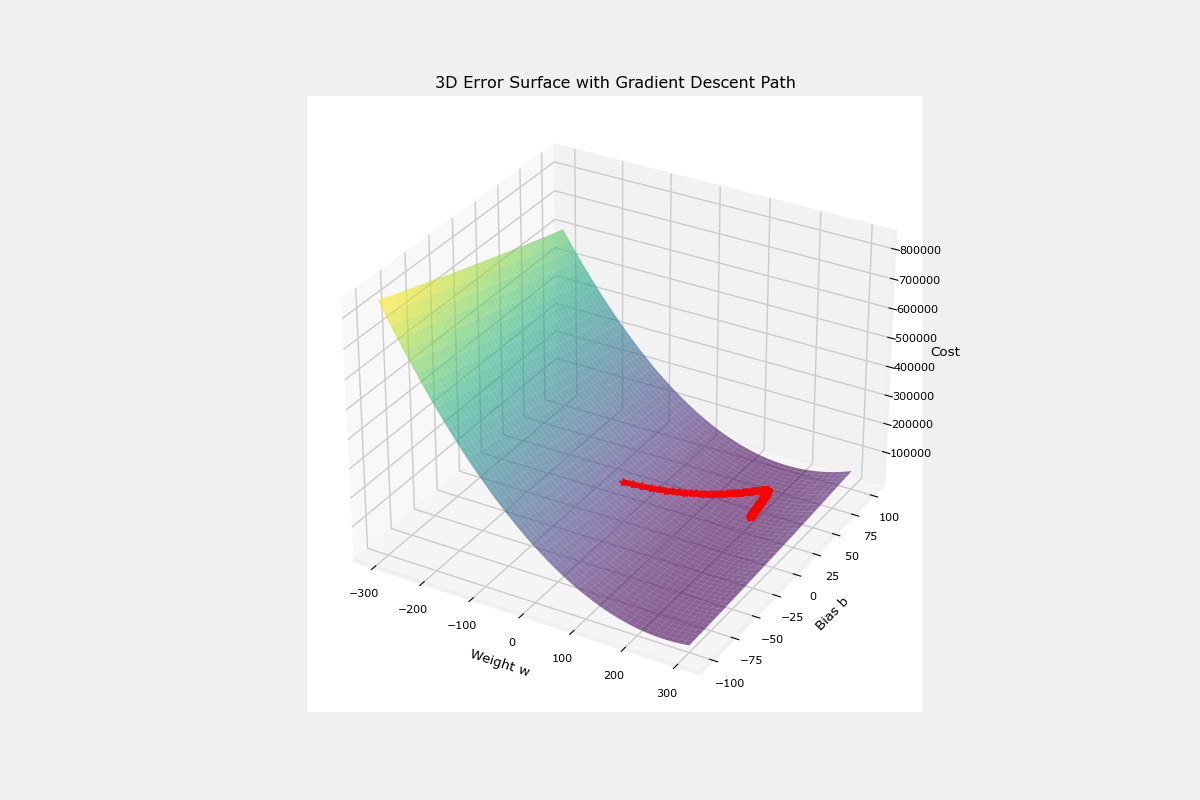

Optimal values of w and b are: w = 195.1142, b = 37.3499


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data points
x = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y = np.array([250, 300, 480, 430, 630, 730])

# Compute cost function
def compute_cost(x, y, w, b):
    m = len(x)
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    return (1 / (2 * m)) * cost_sum

# Initialize parameters
w = 0.0
b = 0.0

# Learning rate and iterations
alpha = 0.01
iterations = 800

# Track w, b, and cost history
w_history = []
b_history = []
cost_history = []

# Gradient descent
for _ in range(iterations):
    w_history.append(w)
    b_history.append(b)
    cost_history.append(compute_cost(x, y, w, b))

    f_wb = w * x + b
    dw = (1 / len(x)) * np.sum((f_wb - y) * x)
    db = (1 / len(x)) * np.sum(f_wb - y)
    w -= alpha * dw
    b -= alpha * db

# Creating the error surface
w_values = np.linspace(-300, 300, 1200)
b_values = np.linspace(-100, 100, 400)
W, B = np.meshgrid(w_values, b_values)
zs = np.array([compute_cost(x, y, w, b) for w, b in zip(np.ravel(W), np.ravel(B))])
Z = zs.reshape(W.shape)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.6)

# Plot the path of gradient descent
ax.plot(w_history, b_history, cost_history, marker='*', color='r')

ax.set_xlabel('Weight w')
ax.set_ylabel('Bias b')
ax.set_zlabel('Cost')
ax.set_title('3D Error Surface with Gradient Descent Path')
plt.show()
print(f"Optimal values of w and b are: w = {w:.4f}, b = {b:.4f}")



# Exercise 2

## Problem

Having 2 datapoints with the following info

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

In [10]:
x = np.array([1.0, 2.0]) #features
y = np.array ([300.0, 500.0]) # target

define compute_cost (same function, rewritten for practice)

In [11]:
def compute_cost(x, y, w, b):
    m = x.shape[0] # Define m
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    return cost / (2 * m)


define compute_gradient

In [13]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient 
    Args:
        x (ndarray(m,)): Data, m examples
        y (ndarray(m)): target values
        w,b (scalar) : model parameters
    Returns
        dj_dw (scalar): gradient of the cost with respect to w
        dj_db (scalar): gradient of the cost with respect to b
    """
    # Initialize variables
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db


Define gradient descent

In [14]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient):
    """
    Performs gradient descent to fit w and b.
    Args:
        x (ndarray (m,)) : Data, m examples
        y (ndarray (m,)) : target values
        w_in, b_in (scalar) : initial model parameters
        alpha (float): Learning rate
        cost_function: callable function that computes the cost
        gradient_function: callable function that computes the gradient
    Returns:
    w (scalar): Updated value
    b (scalar): Updated value 
    J_history (List): History of cost values
    p_history (list): History of parameters [w,b]
    """

    w = copy.deepcopy(w_in) # Avoid modyfying global w_in

    # Array to store cost J and w's at each iteration for graphing
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        if i < 100000: #To prevent memory overflow
            J_history.append(compute_cost(x, y, w, b))
            p_history.append([w, b])
        # Print cost every 10 iterations
        if i % 10 == 0:
            print(f"Iteration {i}: Cost {J_history[-1]:.4f}")
            (f"dj_dw {dj_dw:.4f}, dj_db {dj_db:.4f}")
            (f"w: {w:.4f}, b: {b:.4f}")
    return w, b, J_history, p_history

In [16]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = .01
w_final, b_final, J_hist, p_hist = gradient_descent(x, y, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration 0: Cost 79274.8125
Iteration 10: Cost 39475.1597
Iteration 20: Cost 19660.2806
Iteration 30: Cost 9795.0827
Iteration 40: Cost 4883.4647
Iteration 50: Cost 2438.0524
Iteration 60: Cost 1220.4742
Iteration 70: Cost 614.1905
Iteration 80: Cost 312.2492
Iteration 90: Cost 161.8301
Iteration 100: Cost 86.8497
Iteration 110: Cost 49.4287
Iteration 120: Cost 30.7085
Iteration 130: Cost 21.3000
Iteration 140: Cost 16.5288
Iteration 150: Cost 14.0675
Iteration 160: Cost 12.7576
Iteration 170: Cost 12.0220
Iteration 180: Cost 11.5737
Iteration 190: Cost 11.2695
Iteration 200: Cost 11.0382
Iteration 210: Cost 10.8445
Iteration 220: Cost 10.6705
Iteration 230: Cost 10.5075
Iteration 240: Cost 10.3511
Iteration 250: Cost 10.1990
Iteration 260: Cost 10.0502
Iteration 270: Cost 9.9041
Iteration 280: Cost 9.7603
Iteration 290: Cost 9.6188
Iteration 300: Cost 9.4793
Iteration 310: Cost 9.3420
Iteration 320: Cost 9.2066
Iteration 330: Cost 9.0732
Iteration 340: Cost 8.9417
Iteration 350: Cost

Cost values for the first 100 iterations and the last 8k iterations

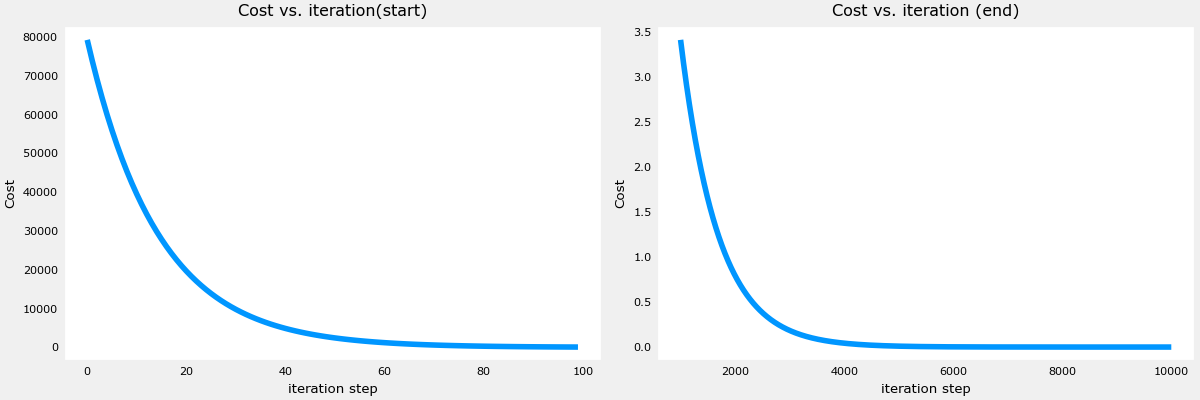

In [17]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

## Predictions
With the optimal values for b and w, we can substitute these values to predict new values. 

In [18]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
